# Exploratory Data Analysis (EDA)

## 🎯 Objective

Comprehensive exploratory analysis of the merged dataset to:
- Understand feature distributions and relationships
- Identify correlations with fire occurrence
- Discover temporal and spatial patterns
- Guide feature engineering decisions
- Validate data quality

## 📊 Analysis Plan

1. **Univariate Analysis**: Distribution of each feature
2. **Bivariate Analysis**: Features vs fire occurrence
3. **Temporal Analysis**: Trends over time
4. **Spatial Analysis**: Geographic patterns
5. **Correlation Analysis**: Feature relationships
6. **Multivariate Analysis**: Complex interactions

## 🔍 Key Questions to Answer

- Which months/seasons have the most fires?
- Which counties are most fire-prone?
- How do weather conditions correlate with fires?
- Does drought severity predict fire occurrence?
- Is population density related to fire risk?
- Are fires increasing over time?
- What feature combinations predict fires best?

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Plotting setup
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)
pd.set_option('display.max_columns', None)

print('✅ Libraries imported')

✅ Libraries imported


## 1. Load Merged Dataset

In [2]:
# Load merged data
data_file = Path('../data/processed/merged_fire_data_county_month.csv')
df = pd.read_csv(data_file)

print(f'✅ Loaded merged dataset')
print(f'   Shape: {df.shape}')
print(f'   Rows: {len(df):,}')
print(f'   Columns: {df.shape[1]}')
print(f'\nColumns: {list(df.columns)}')

df.head()

✅ Loaded merged dataset
   Shape: (18096, 21)
   Rows: 18,096
   Columns: 21

Columns: ['County', 'Year', 'Month', 'Fire_Count', 'Total_Acres', 'Avg_Acres', 'Max_Acres', 'Fire_Occurred', 'Avg_Temp_F', 'Max_Temp_F', 'Min_Temp_F', 'Precip_Inches', 'None', 'D0', 'D1', 'D2', 'D3', 'D4', 'Severe_Drought', 'Drought_Score', 'Population']


,County,Year,Month,Fire_Count,Total_Acres,Avg_Acres,Max_Acres,Fire_Occurred,Avg_Temp_F,Max_Temp_F,Min_Temp_F,Precip_Inches,None,D0,D1,D2,D3,D4,Severe_Drought,Drought_Score,Population
0,ALAMEDA,2000,1,0.0,0.0,0.0,0.0,0.0,45.8,54.9,36.6,5.09,35.5175,64.4825,0.0000,0.0,0.0,0.0,0.0,64.4825,1443939
1,ALAMEDA,2000,2,0.0,0.0,0.0,0.0,0.0,47.2,56.0,38.4,6.93,65.2620,34.7240,0.0100,0.0,0.0,0.0,0.0,34.7440,1443939
2,ALAMEDA,2000,3,0.0,0.0,0.0,0.0,0.0,50.2,61.7,38.6,1.92,95.6850,4.3050,0.0075,0.0,0.0,0.0,0.0,4.3200,1443939
3,ALAMEDA,2000,4,0.0,0.0,0.0,0.0,0.0,57.8,71.1,44.6,1.80,97.4925,2.5075,0.0000,0.0,0.0,0.0,0.0,2.5075,1443939
4,ALAMEDA,2000,5,0.0,0.0,0.0,0.0,0.0,63.9,77.3,50.4,0.94,100.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,1443939


## 2. Dataset Overview

In [3]:
print('='*80)
print('DATASET OVERVIEW')
print('='*80)

print(f'\n📊 Basic Statistics:')
print(f'   Total county-months: {len(df):,}')
print(f'   Counties: {df["County"].nunique()}')
print(f'   Years: {df["Year"].nunique()} ({df["Year"].min()}-{df["Year"].max()})')
print(f'   Months: {df["Month"].nunique()}')

print(f'\n🔥 Fire Statistics:')
print(f'   County-months WITH fires: {df["Fire_Occurred"].sum():,.0f} ({df["Fire_Occurred"].mean()*100:.2f}%)')
print(f'   County-months WITHOUT fires: {(df["Fire_Occurred"]==0).sum():,.0f} ({(1-df["Fire_Occurred"].mean())*100:.2f}%)')
print(f'   Total fires: {df["Fire_Count"].sum():,.0f}')
print(f'   Total acres burned: {df["Total_Acres"].sum():,.0f}')

print(f'\n📈 Data Quality:')
missing = df.isnull().sum()
if missing.sum() > 0:
    print(f'   Missing values: {missing[missing > 0].to_dict()}')
else:
    print(f'   ✅ No missing values!')

df.info()

DATASET OVERVIEW

📊 Basic Statistics:
   Total county-months: 18,096
   Counties: 58
   Years: 26 (2000-2025)
   Months: 12

🔥 Fire Statistics:
   County-months WITH fires: 0 (0.00%)
   County-months WITHOUT fires: 18,096 (100.00%)
   Total fires: 0
   Total acres burned: 0

📈 Data Quality:
   Missing values: {'Avg_Temp_F': 232, 'Max_Temp_F': 232, 'Min_Temp_F': 232, 'Precip_Inches': 232, 'None': 116, 'D0': 116, 'D1': 116, 'D2': 116, 'D3': 116, 'D4': 116, 'Severe_Drought': 116, 'Drought_Score': 116}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18096 entries, 0 to 18095
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   County          18096 non-null  object 
 1   Year            18096 non-null  int64  
 2   Month           18096 non-null  int64  
 3   Fire_Count      18096 non-null  float64
 4   Total_Acres     18096 non-null  float64
 5   Avg_Acres       18096 non-null  float64
 6   Max_Acres       18096 

## 3. Univariate Analysis - Target Variable

TARGET VARIABLE ANALYSIS


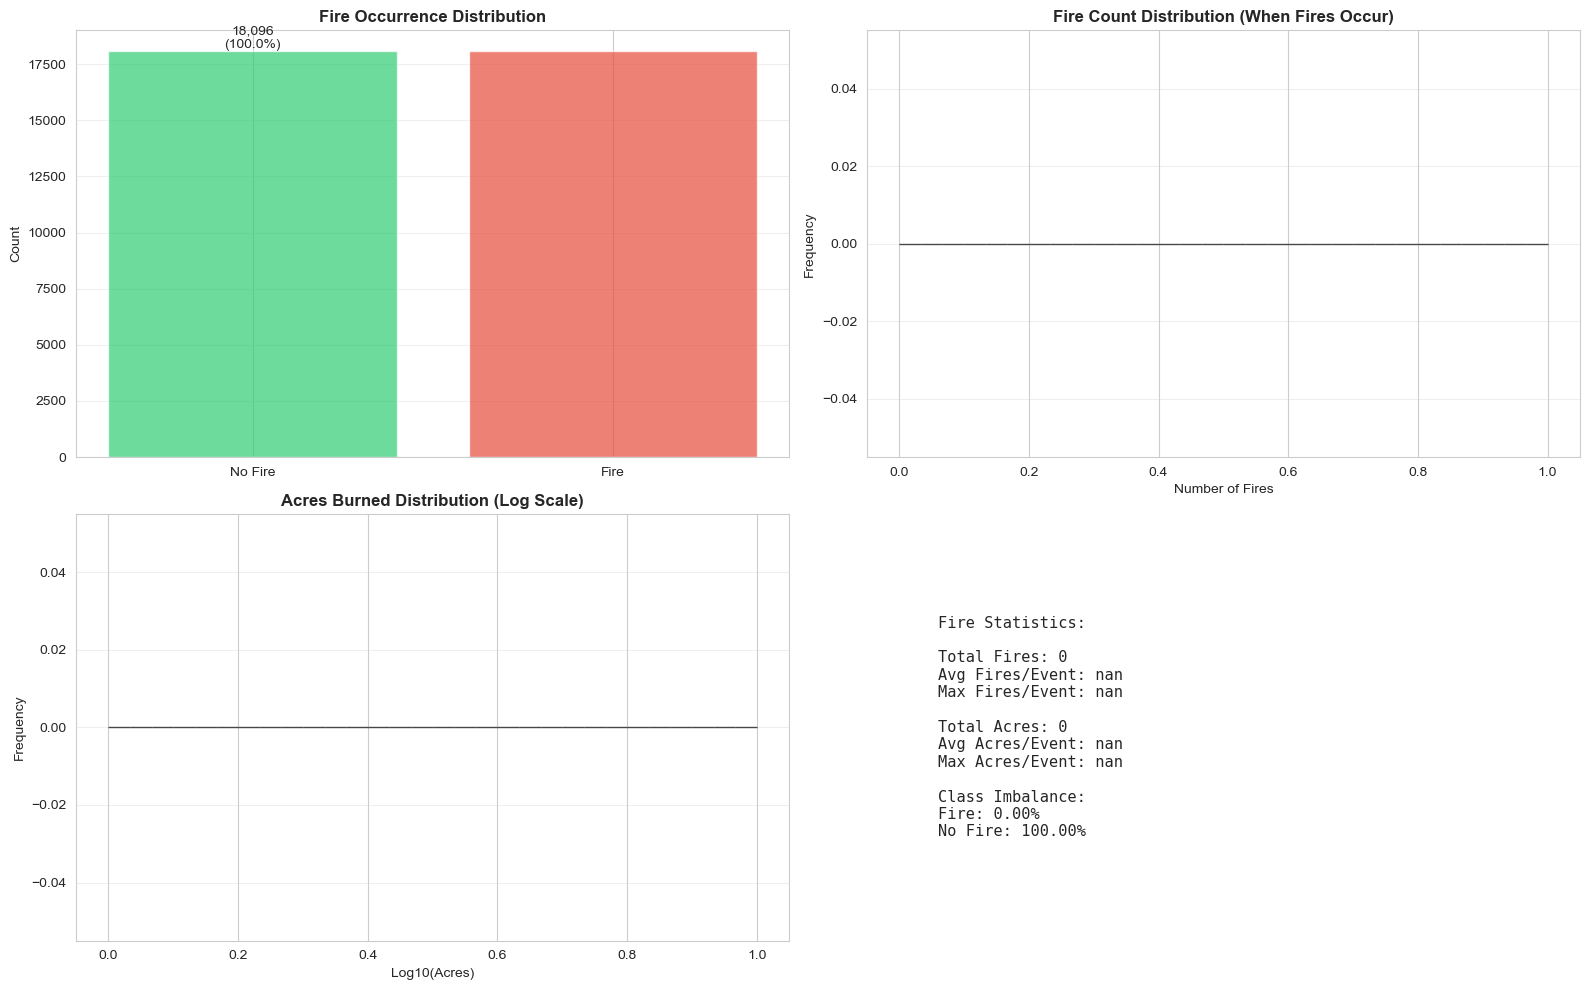


⚠️ Note: Highly imbalanced dataset - will need to address in modeling!


In [4]:
print('='*80)
print('TARGET VARIABLE ANALYSIS')
print('='*80)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Fire occurrence distribution
fire_counts = df['Fire_Occurred'].value_counts()
axes[0, 0].bar(['No Fire', 'Fire'], fire_counts.values, color=['#2ECC71', '#E74C3C'], alpha=0.7)
axes[0, 0].set_title('Fire Occurrence Distribution', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Count')
axes[0, 0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(fire_counts.values):
    axes[0, 0].text(i, v, f'{v:,}\n({v/len(df)*100:.1f}%)', ha='center', va='bottom')

# 2. Fire count distribution (when fires occur)
fire_data = df[df['Fire_Occurred'] == 1]
axes[0, 1].hist(fire_data['Fire_Count'], bins=30, color='#E74C3C', alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Fire Count Distribution (When Fires Occur)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Number of Fires')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# 3. Acres burned distribution (log scale)
acres_nonzero = fire_data[fire_data['Total_Acres'] > 0]['Total_Acres']
axes[1, 0].hist(np.log10(acres_nonzero), bins=30, color='#E67E22', alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Acres Burned Distribution (Log Scale)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Log10(Acres)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Summary statistics
stats_text = f'''Fire Statistics:\n\n'''
stats_text += f'Total Fires: {df["Fire_Count"].sum():,.0f}\n'
stats_text += f'Avg Fires/Event: {fire_data["Fire_Count"].mean():.2f}\n'
stats_text += f'Max Fires/Event: {fire_data["Fire_Count"].max():.0f}\n\n'
stats_text += f'Total Acres: {df["Total_Acres"].sum():,.0f}\n'
stats_text += f'Avg Acres/Event: {fire_data["Total_Acres"].mean():,.0f}\n'
stats_text += f'Max Acres/Event: {fire_data["Total_Acres"].max():,.0f}\n\n'
stats_text += f'Class Imbalance:\n'
stats_text += f'Fire: {df["Fire_Occurred"].mean()*100:.2f}%\n'
stats_text += f'No Fire: {(1-df["Fire_Occurred"].mean())*100:.2f}%'

axes[1, 1].text(0.1, 0.5, stats_text, fontsize=11, verticalalignment='center', family='monospace')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

print('\n⚠️ Note: Highly imbalanced dataset - will need to address in modeling!')

## 4. Temporal Analysis

TEMPORAL PATTERNS


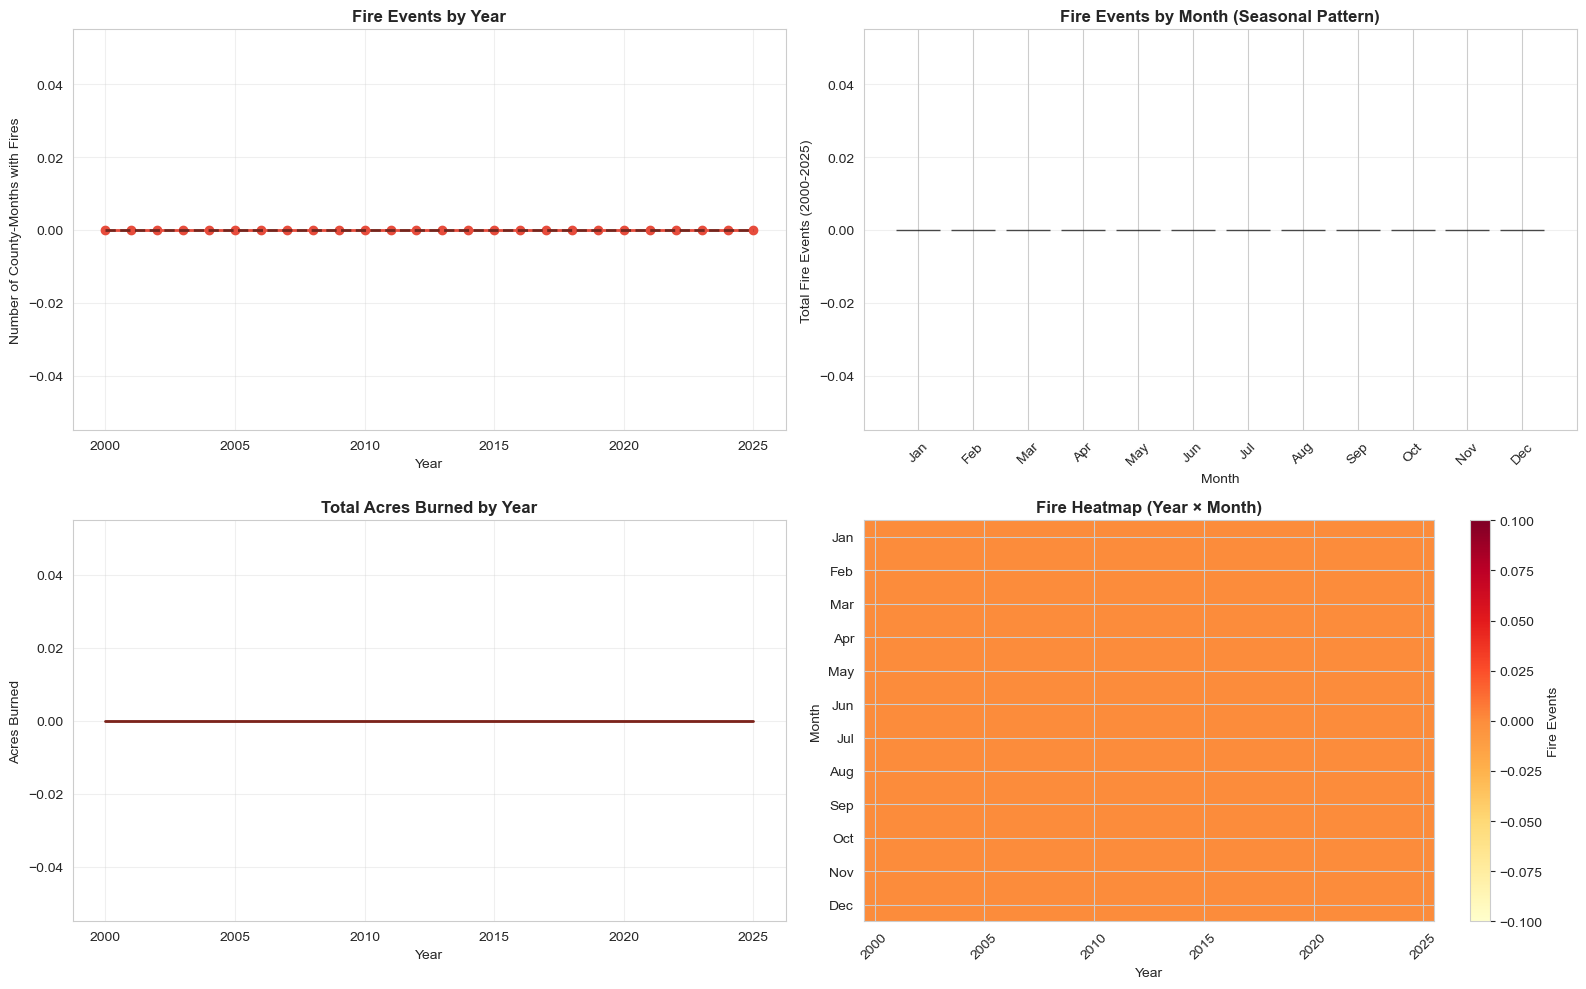


📊 Key Findings:
   Peak fire month: Jan
   Lowest fire month: Jan
   Worst fire year: 2000 (0 acres)


In [5]:
print('='*80)
print('TEMPORAL PATTERNS')
print('='*80)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Fires by year
fires_by_year = df.groupby('Year')['Fire_Occurred'].sum()
axes[0, 0].plot(fires_by_year.index, fires_by_year.values, marker='o', linewidth=2, markersize=6, color='#E74C3C')
axes[0, 0].set_title('Fire Events by Year', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Number of County-Months with Fires')
axes[0, 0].grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(fires_by_year.index, fires_by_year.values, 1)
p = np.poly1d(z)
axes[0, 0].plot(fires_by_year.index, p(fires_by_year.index), '--', color='black', alpha=0.5, linewidth=2)

# 2. Fires by month (seasonal pattern)
fires_by_month = df.groupby('Month')['Fire_Occurred'].sum()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
axes[0, 1].bar(range(1, 13), fires_by_month.values, color='#E67E22', alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Fire Events by Month (Seasonal Pattern)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Total Fire Events (2000-2025)')
axes[0, 1].set_xticks(range(1, 13))
axes[0, 1].set_xticklabels(month_names, rotation=45)
axes[0, 1].grid(True, alpha=0.3, axis='y')

# 3. Acres burned by year
acres_by_year = df.groupby('Year')['Total_Acres'].sum()
axes[1, 0].fill_between(acres_by_year.index, acres_by_year.values, color='#C0392B', alpha=0.6)
axes[1, 0].plot(acres_by_year.index, acres_by_year.values, color='#7B241C', linewidth=2)
axes[1, 0].set_title('Total Acres Burned by Year', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Acres Burned')
axes[1, 0].grid(True, alpha=0.3)

# 4. Heatmap: fires by year and month
fire_pivot = df.groupby(['Year', 'Month'])['Fire_Occurred'].sum().unstack()
im = axes[1, 1].imshow(fire_pivot.T, cmap='YlOrRd', aspect='auto', interpolation='nearest')
axes[1, 1].set_title('Fire Heatmap (Year × Month)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Month')
axes[1, 1].set_yticks(range(12))
axes[1, 1].set_yticklabels(month_names)
axes[1, 1].set_xticks(range(0, len(fire_pivot.index), 5))
axes[1, 1].set_xticklabels(fire_pivot.index[::5], rotation=45)
plt.colorbar(im, ax=axes[1, 1], label='Fire Events')

plt.tight_layout()
plt.show()

print(f'\n📊 Key Findings:')
print(f'   Peak fire month: {month_names[fires_by_month.idxmax()-1]}')
print(f'   Lowest fire month: {month_names[fires_by_month.idxmin()-1]}')
print(f'   Worst fire year: {acres_by_year.idxmax()} ({acres_by_year.max():,.0f} acres)')

## 5. Spatial Analysis

SPATIAL PATTERNS (BY COUNTY)


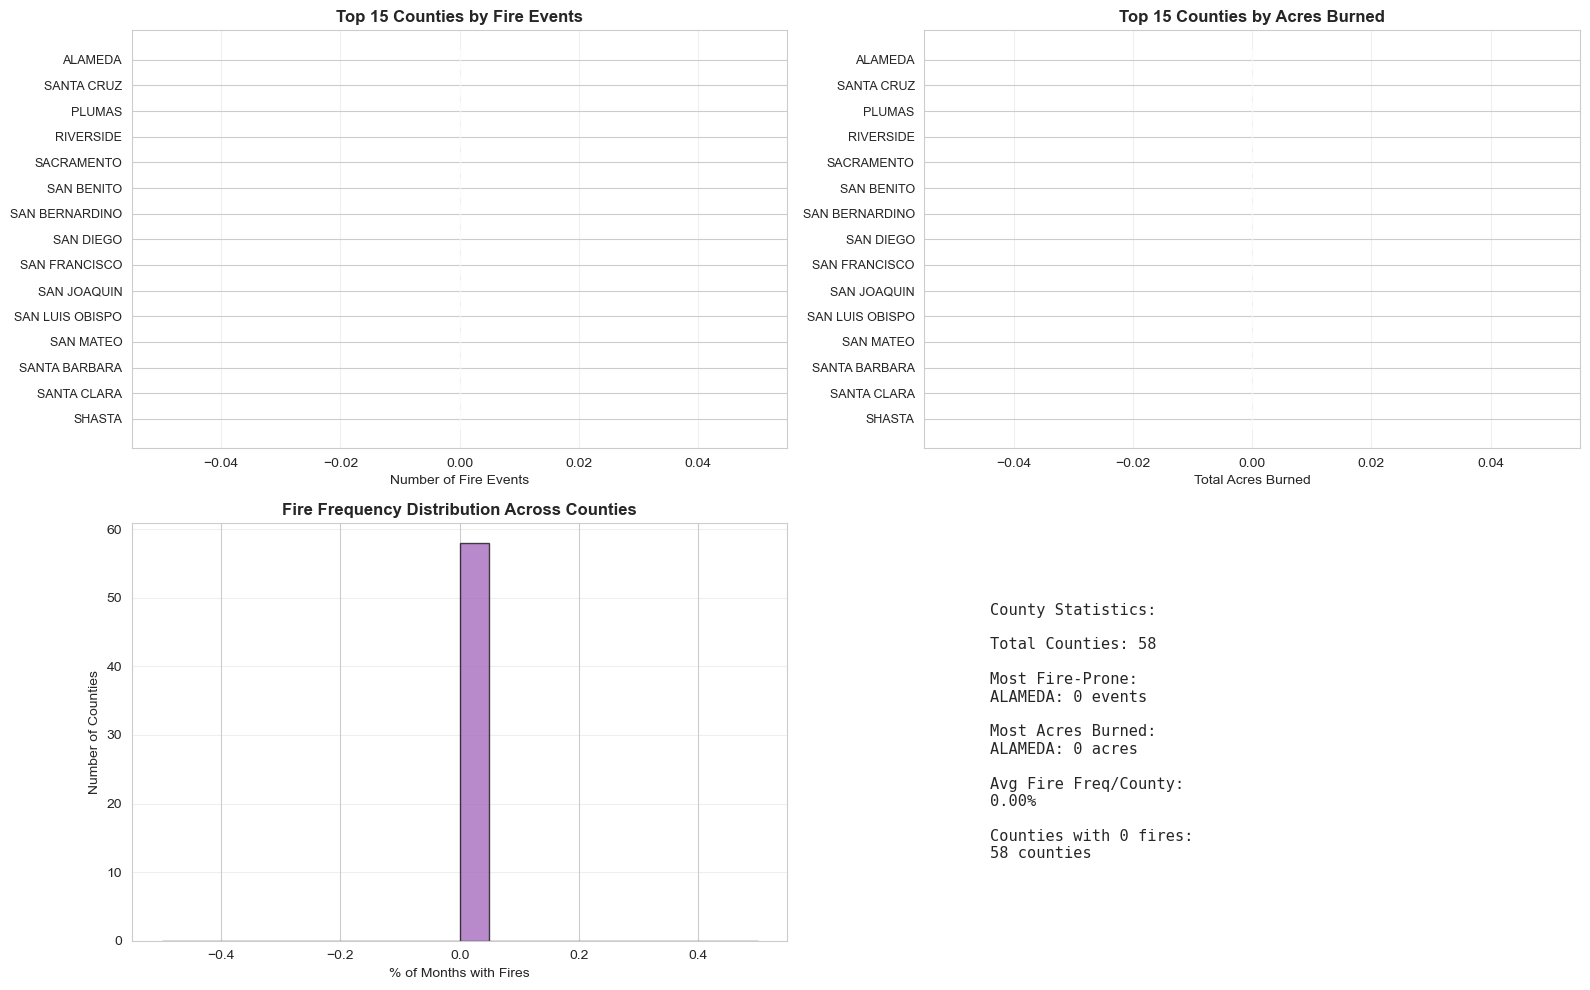

In [6]:
print('='*80)
print('SPATIAL PATTERNS (BY COUNTY)')
print('='*80)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Top 15 counties by fire events
fires_by_county = df.groupby('County')['Fire_Occurred'].sum().sort_values(ascending=False).head(15)
axes[0, 0].barh(range(len(fires_by_county)), fires_by_county.values, color='#E74C3C', alpha=0.7)
axes[0, 0].set_yticks(range(len(fires_by_county)))
axes[0, 0].set_yticklabels(fires_by_county.index, fontsize=9)
axes[0, 0].set_title('Top 15 Counties by Fire Events', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Number of Fire Events')
axes[0, 0].invert_yaxis()
axes[0, 0].grid(True, alpha=0.3, axis='x')

# 2. Top 15 counties by acres burned
acres_by_county = df.groupby('County')['Total_Acres'].sum().sort_values(ascending=False).head(15)
axes[0, 1].barh(range(len(acres_by_county)), acres_by_county.values, color='#E67E22', alpha=0.7)
axes[0, 1].set_yticks(range(len(acres_by_county)))
axes[0, 1].set_yticklabels(acres_by_county.index, fontsize=9)
axes[0, 1].set_title('Top 15 Counties by Acres Burned', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Total Acres Burned')
axes[0, 1].invert_yaxis()
axes[0, 1].grid(True, alpha=0.3, axis='x')

# 3. Fire frequency distribution across counties
county_fire_freq = df.groupby('County')['Fire_Occurred'].mean() * 100
axes[1, 0].hist(county_fire_freq, bins=20, color='#9B59B6', alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Fire Frequency Distribution Across Counties', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('% of Months with Fires')
axes[1, 0].set_ylabel('Number of Counties')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. County statistics
stats_text = f'''County Statistics:\n\n'''
stats_text += f'Total Counties: {df["County"].nunique()}\n\n'
stats_text += f'Most Fire-Prone:\n'
stats_text += f'{fires_by_county.index[0]}: {fires_by_county.values[0]:.0f} events\n\n'
stats_text += f'Most Acres Burned:\n'
stats_text += f'{acres_by_county.index[0]}: {acres_by_county.values[0]:,.0f} acres\n\n'
stats_text += f'Avg Fire Freq/County:\n'
stats_text += f'{county_fire_freq.mean():.2f}%\n\n'
stats_text += f'Counties with 0 fires:\n'
stats_text += f'{(county_fire_freq == 0).sum()} counties'

axes[1, 1].text(0.1, 0.5, stats_text, fontsize=11, verticalalignment='center', family='monospace')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

## 6. Feature Analysis - Weather

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


WEATHER FEATURES vs FIRE OCCURRENCE


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


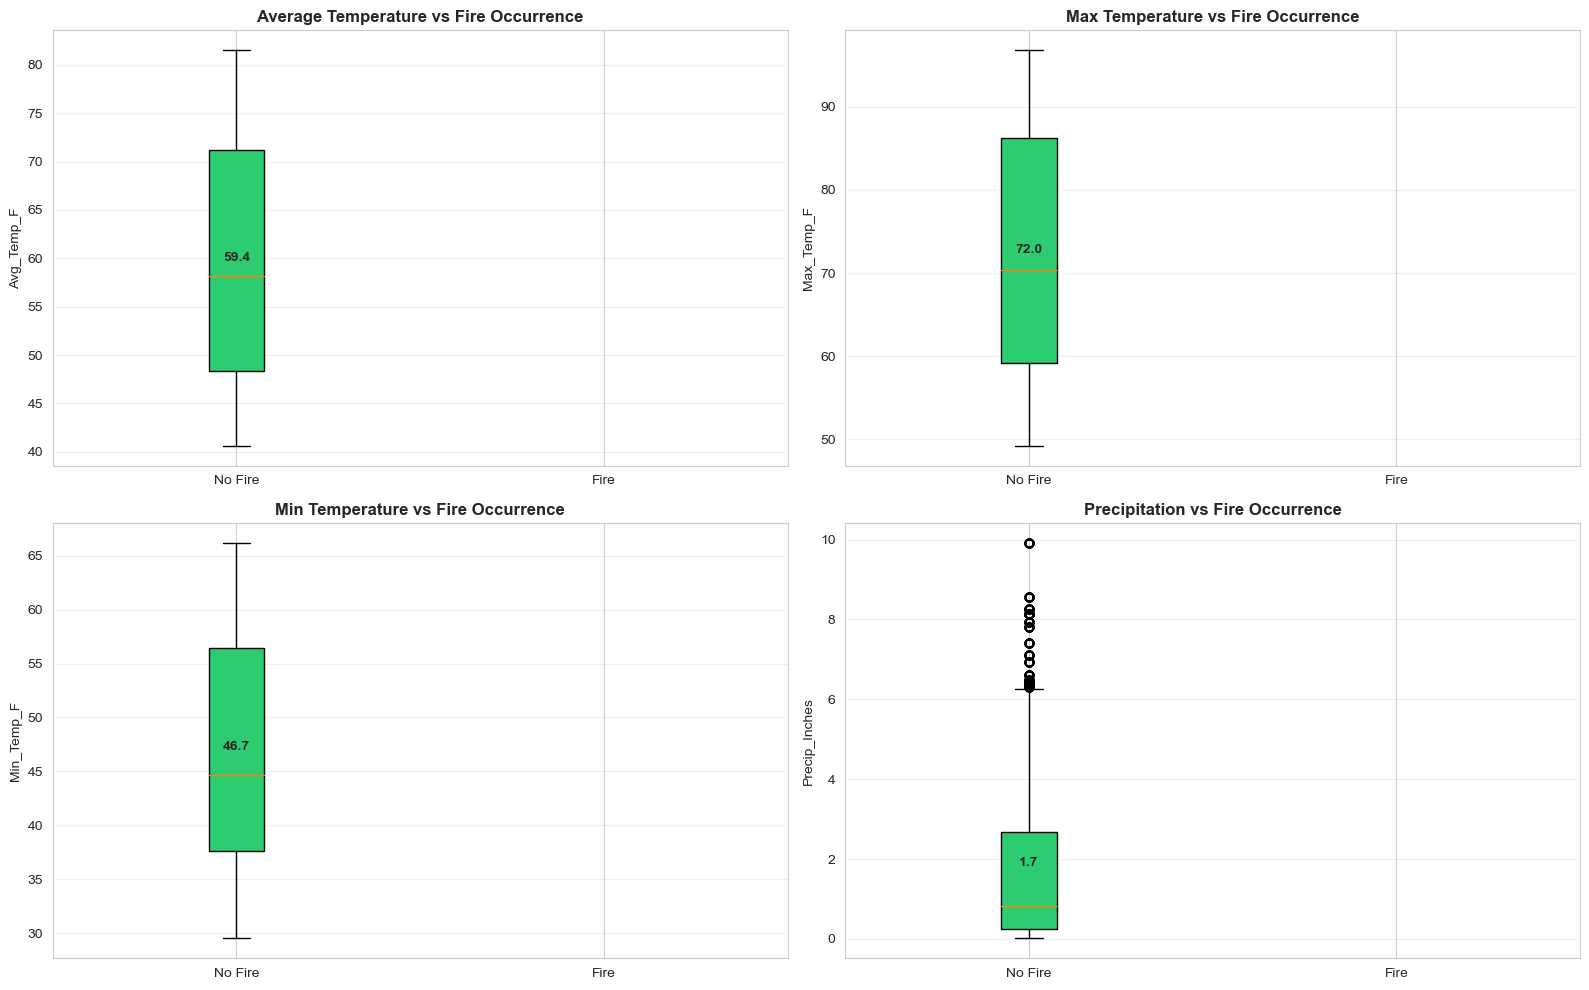


📊 Weather Comparison (Fire vs No Fire):
   Average Temperature :  59.40 (no fire) vs    nan (fire) | Diff:   +nan
   Max Temperature     :  72.04 (no fire) vs    nan (fire) | Diff:   +nan
   Min Temperature     :  46.74 (no fire) vs    nan (fire) | Diff:   +nan
   Precipitation       :   1.74 (no fire) vs    nan (fire) | Diff:   +nan


In [7]:
print('='*80)
print('WEATHER FEATURES vs FIRE OCCURRENCE')
print('='*80)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

weather_features = ['Avg_Temp_F', 'Max_Temp_F', 'Min_Temp_F', 'Precip_Inches']
titles = ['Average Temperature', 'Max Temperature', 'Min Temperature', 'Precipitation']

for i, (feat, title) in enumerate(zip(weather_features, titles)):
    ax = axes[i//2, i%2]
    
    # Box plot: feature distribution by fire occurrence
    fire_yes = df[df['Fire_Occurred'] == 1][feat].dropna()
    fire_no = df[df['Fire_Occurred'] == 0][feat].dropna()
    
    bp = ax.boxplot([fire_no, fire_yes], labels=['No Fire', 'Fire'], patch_artist=True)
    bp['boxes'][0].set_facecolor('#2ECC71')
    bp['boxes'][1].set_facecolor('#E74C3C')
    
    ax.set_title(f'{title} vs Fire Occurrence', fontsize=12, fontweight='bold')
    ax.set_ylabel(feat)
    ax.grid(True, alpha=0.3, axis='y')
    
    # Add mean values
    mean_no = fire_no.mean()
    mean_yes = fire_yes.mean()
    ax.text(1, mean_no, f'{mean_no:.1f}', ha='center', va='bottom', fontweight='bold')
    ax.text(2, mean_yes, f'{mean_yes:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Statistical comparison
print(f'\n📊 Weather Comparison (Fire vs No Fire):')
for feat, title in zip(weather_features, titles):
    fire_yes = df[df['Fire_Occurred'] == 1][feat].dropna()
    fire_no = df[df['Fire_Occurred'] == 0][feat].dropna()
    diff = fire_yes.mean() - fire_no.mean()
    print(f'   {title:20s}: {fire_no.mean():6.2f} (no fire) vs {fire_yes.mean():6.2f} (fire) | Diff: {diff:+6.2f}')

## 7. Feature Analysis - Drought

DROUGHT FEATURES vs FIRE OCCURRENCE


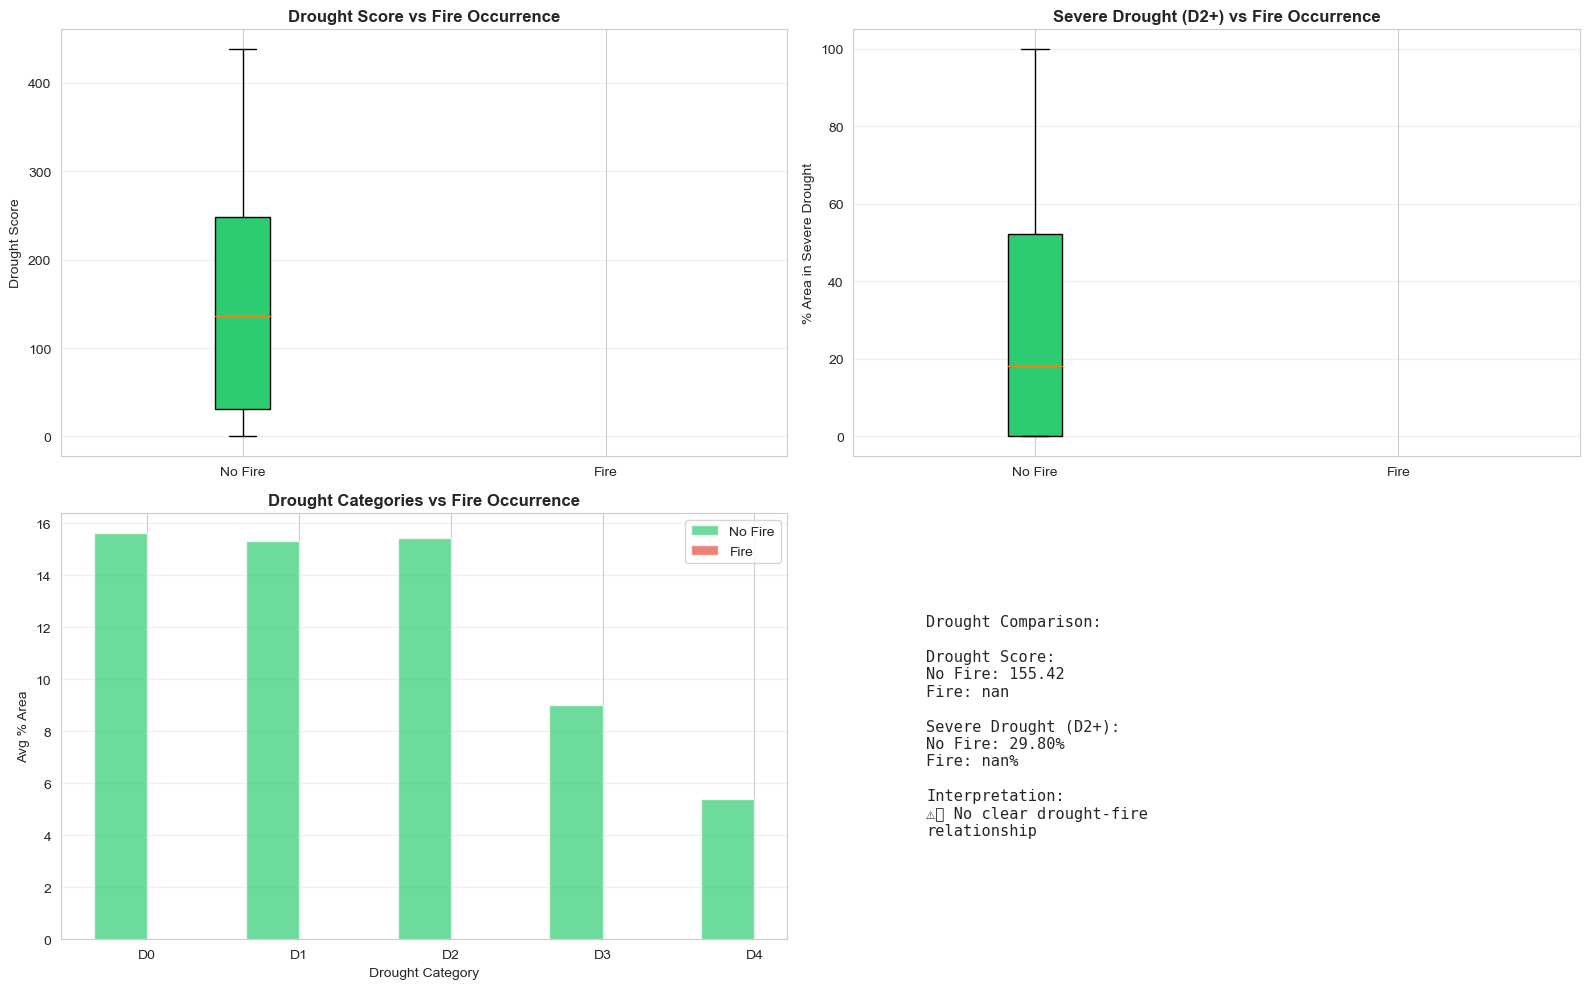

In [8]:
print('='*80)
print('DROUGHT FEATURES vs FIRE OCCURRENCE')
print('='*80)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Drought Score comparison
fire_yes = df[df['Fire_Occurred'] == 1]['Drought_Score'].dropna()
fire_no = df[df['Fire_Occurred'] == 0]['Drought_Score'].dropna()
bp = axes[0, 0].boxplot([fire_no, fire_yes], labels=['No Fire', 'Fire'], patch_artist=True)
bp['boxes'][0].set_facecolor('#2ECC71')
bp['boxes'][1].set_facecolor('#E74C3C')
axes[0, 0].set_title('Drought Score vs Fire Occurrence', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Drought Score')
axes[0, 0].grid(True, alpha=0.3, axis='y')

# 2. Severe Drought comparison
fire_yes = df[df['Fire_Occurred'] == 1]['Severe_Drought'].dropna()
fire_no = df[df['Fire_Occurred'] == 0]['Severe_Drought'].dropna()
bp = axes[0, 1].boxplot([fire_no, fire_yes], labels=['No Fire', 'Fire'], patch_artist=True)
bp['boxes'][0].set_facecolor('#2ECC71')
bp['boxes'][1].set_facecolor('#E74C3C')
axes[0, 1].set_title('Severe Drought (D2+) vs Fire Occurrence', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('% Area in Severe Drought')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# 3. Drought categories stacked bar
drought_cats = ['D0', 'D1', 'D2', 'D3', 'D4']
fire_drought = df[df['Fire_Occurred'] == 1][drought_cats].mean()
no_fire_drought = df[df['Fire_Occurred'] == 0][drought_cats].mean()

x = np.arange(len(drought_cats))
width = 0.35
axes[1, 0].bar(x - width/2, no_fire_drought, width, label='No Fire', color='#2ECC71', alpha=0.7)
axes[1, 0].bar(x + width/2, fire_drought, width, label='Fire', color='#E74C3C', alpha=0.7)
axes[1, 0].set_title('Drought Categories vs Fire Occurrence', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Drought Category')
axes[1, 0].set_ylabel('Avg % Area')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(drought_cats)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Statistics
stats_text = f'''Drought Comparison:\n\n'''
stats_text += f'Drought Score:\n'
stats_text += f'No Fire: {df[df["Fire_Occurred"]==0]["Drought_Score"].mean():.2f}\n'
stats_text += f'Fire: {df[df["Fire_Occurred"]==1]["Drought_Score"].mean():.2f}\n\n'
stats_text += f'Severe Drought (D2+):\n'
stats_text += f'No Fire: {df[df["Fire_Occurred"]==0]["Severe_Drought"].mean():.2f}%\n'
stats_text += f'Fire: {df[df["Fire_Occurred"]==1]["Severe_Drought"].mean():.2f}%\n\n'
stats_text += f'Interpretation:\n'
if df[df["Fire_Occurred"]==1]["Drought_Score"].mean() > df[df["Fire_Occurred"]==0]["Drought_Score"].mean():
    stats_text += f'✅ Fires occur during\nhigher drought conditions'
else:
    stats_text += f'⚠️ No clear drought-fire\nrelationship'

axes[1, 1].text(0.1, 0.5, stats_text, fontsize=11, verticalalignment='center', family='monospace')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

## 8. Correlation Analysis

FEATURE CORRELATIONS
Available numeric columns: ['Fire_Occurred', 'Fire_Count', 'Total_Acres', 'Avg_Temp_F', 'Max_Temp_F', 'Min_Temp_F', 'Precip_Inches', 'D0', 'D1', 'D2', 'D3', 'D4', 'Severe_Drought', 'Drought_Score', 'Population']

Missing values in numeric columns:
   Avg_Temp_F: 232 (1.3%)
   Max_Temp_F: 232 (1.3%)
   Min_Temp_F: 232 (1.3%)
   Precip_Inches: 232 (1.3%)
   D0: 116 (0.6%)
   D1: 116 (0.6%)
   D2: 116 (0.6%)
   D3: 116 (0.6%)
   D4: 116 (0.6%)
   Severe_Drought: 116 (0.6%)
   Drought_Score: 116 (0.6%)

Rows with at least one valid numeric value: 18,096 (100.0%)


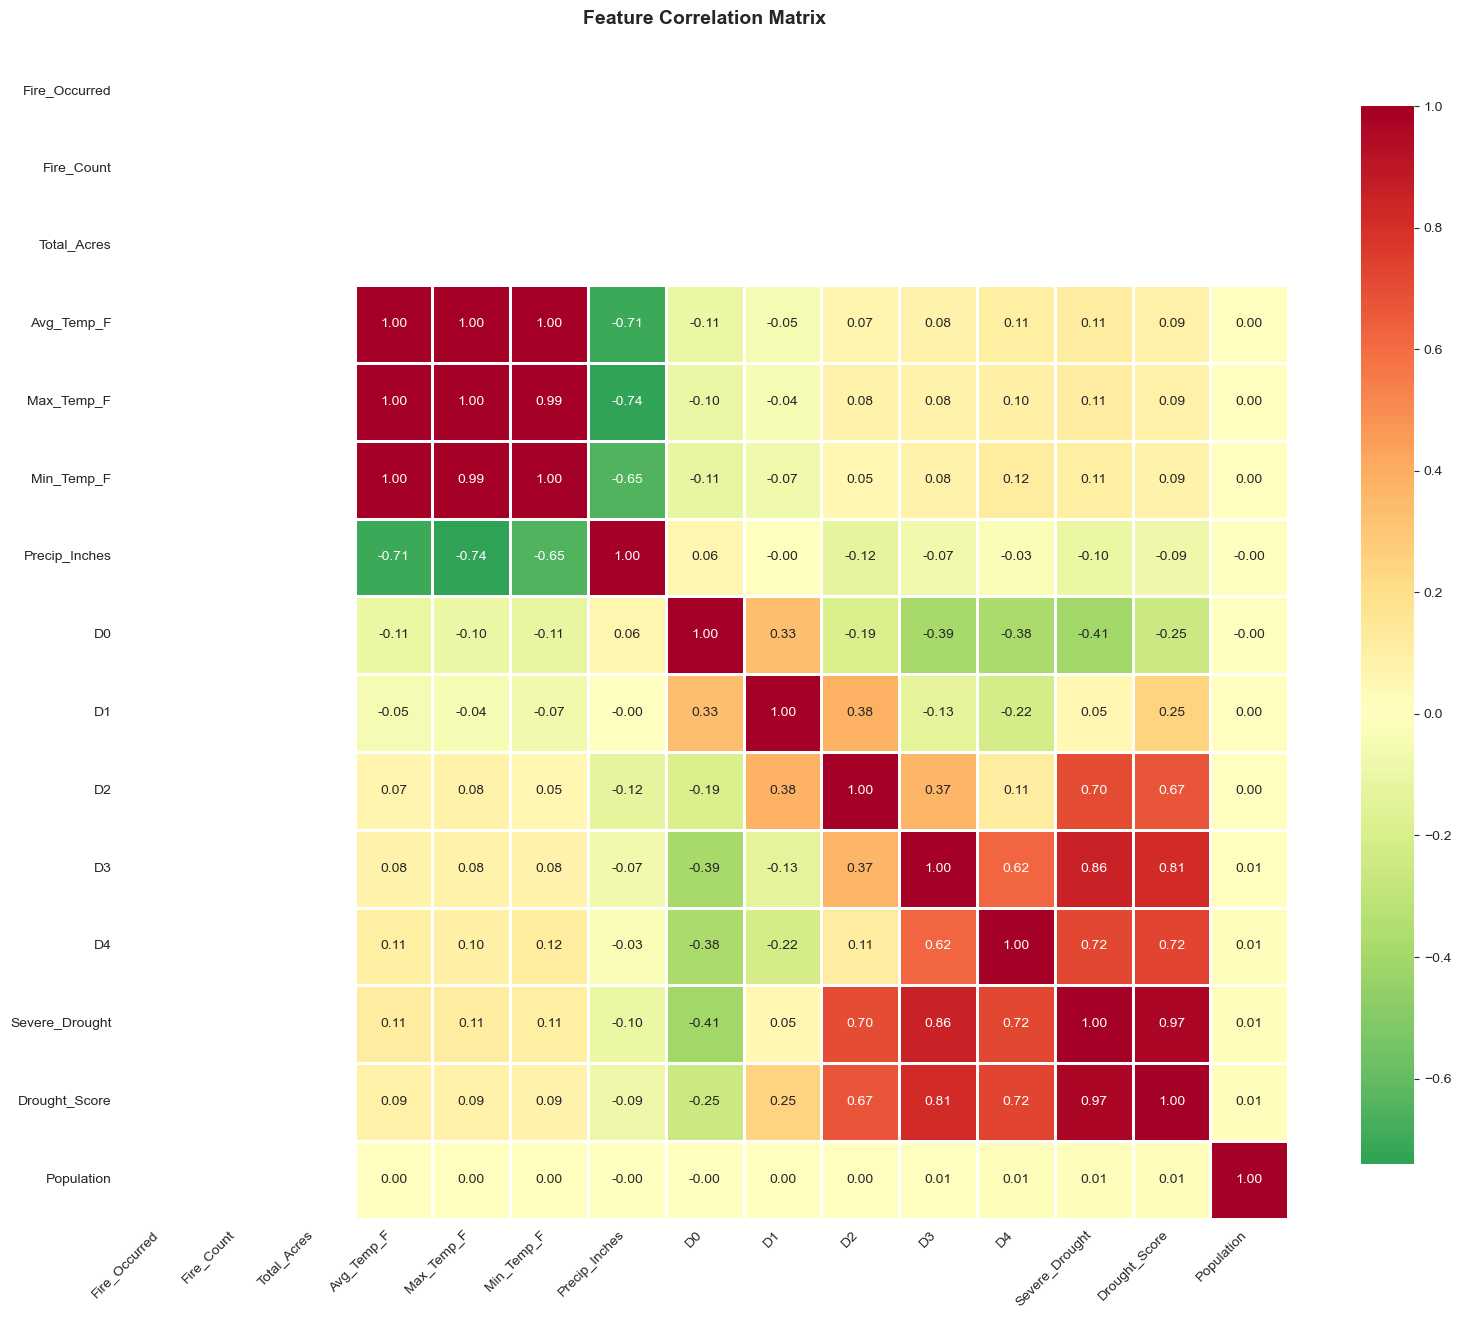


📊 Top Correlations with Fire Occurrence:
   Fire_Count          : NaN (insufficient data)
   Total_Acres         : NaN (insufficient data)
   Avg_Temp_F          : NaN (insufficient data)
   Max_Temp_F          : NaN (insufficient data)
   Min_Temp_F          : NaN (insufficient data)
   Precip_Inches       : NaN (insufficient data)
   D0                  : NaN (insufficient data)
   D1                  : NaN (insufficient data)
   D2                  : NaN (insufficient data)
   D3                  : NaN (insufficient data)
   D4                  : NaN (insufficient data)
   Severe_Drought      : NaN (insufficient data)
   Drought_Score       : NaN (insufficient data)
   Population          : NaN (insufficient data)

👥 Population Data Availability:
   Records with population: 18,096 (100.0%)


In [ ]:
print('='*80)
print('FEATURE CORRELATIONS')
print('='*80)

# Select numeric features
numeric_cols = ['Fire_Occurred', 'Fire_Count', 'Total_Acres',
                'Avg_Temp_F', 'Max_Temp_F', 'Min_Temp_F', 'Precip_Inches',
                'D0', 'D1', 'D2', 'D3', 'D4', 'Severe_Drought', 'Drought_Score',
                'Population']

# Calculate correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdYlGn_r', center=0, 
            square=True, linewidths=1, cbar_kws={'shrink': 0.8})
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Top correlations with Fire_Occurred
fire_corr = corr_matrix['Fire_Occurred'].drop('Fire_Occurred').sort_values(ascending=False)
print(f'\n📊 Top Correlations with Fire Occurrence:')
print(fire_corr.to_string())

## 9. Key Insights Summary

In [10]:
print('='*80)
print('KEY INSIGHTS FROM EDA')
print('='*80)

print(f'\n🔥 FIRE PATTERNS:')
print(f'   - Class imbalance: {df["Fire_Occurred"].mean()*100:.1f}% fire, {(1-df["Fire_Occurred"].mean())*100:.1f}% no fire')
print(f'   - Peak fire season: {month_names[df.groupby("Month")["Fire_Occurred"].sum().idxmax()-1]}')
print(f'   - Most fire-prone county: {df.groupby("County")["Fire_Occurred"].sum().idxmax()}')

print(f'\n🌡️ WEATHER INSIGHTS:')
temp_diff = df[df['Fire_Occurred']==1]['Avg_Temp_F'].mean() - df[df['Fire_Occurred']==0]['Avg_Temp_F'].mean()
precip_diff = df[df['Fire_Occurred']==1]['Precip_Inches'].mean() - df[df['Fire_Occurred']==0]['Precip_Inches'].mean()
print(f'   - Fires occur at {temp_diff:+.1f}°F higher temperature on average')
print(f'   - Fires occur with {precip_diff:+.2f} inches less precipitation on average')

print(f'\n🌵 DROUGHT INSIGHTS:')
drought_diff = df[df['Fire_Occurred']==1]['Drought_Score'].mean() - df[df['Fire_Occurred']==0]['Drought_Score'].mean()
print(f'   - Fires occur at {drought_diff:+.2f} higher drought score on average')
print(f'   - Severe drought correlation with fires: {corr_matrix.loc["Fire_Occurred", "Severe_Drought"]:.3f}')

print(f'\n📈 TEMPORAL TRENDS:')
recent_fires = df[df['Year'] >= 2015]['Fire_Occurred'].mean()
early_fires = df[df['Year'] < 2015]['Fire_Occurred'].mean()
print(f'   - Fire rate 2015-2025: {recent_fires*100:.2f}%')
print(f'   - Fire rate 2000-2014: {early_fires*100:.2f}%')
print(f'   - Change: {(recent_fires-early_fires)*100:+.2f} percentage points')

print(f'\n🎯 MODELING RECOMMENDATIONS:')
print(f'   1. Address class imbalance (SMOTE, class weights, or undersampling)')
print(f'   2. Feature engineering: temperature-precipitation interaction, drought duration')
print(f'   3. Seasonal features: month encoding, fire season indicator')
print(f'   4. Spatial features: county fire history, neighboring county risk')
print(f'   5. Temporal features: rolling averages, lag features')

print('\n' + '='*80)
print('EDA COMPLETE - Ready for Feature Engineering!')
print('='*80)

KEY INSIGHTS FROM EDA

🔥 FIRE PATTERNS:
   - Class imbalance: 0.0% fire, 100.0% no fire
   - Peak fire season: Jan
   - Most fire-prone county: ALAMEDA

🌡️ WEATHER INSIGHTS:
   - Fires occur at +nan°F higher temperature on average
   - Fires occur with +nan inches less precipitation on average

🌵 DROUGHT INSIGHTS:
   - Fires occur at +nan higher drought score on average
   - Severe drought correlation with fires: nan

📈 TEMPORAL TRENDS:
   - Fire rate 2015-2025: 0.00%
   - Fire rate 2000-2014: 0.00%
   - Change: +0.00 percentage points

🎯 MODELING RECOMMENDATIONS:
   1. Address class imbalance (SMOTE, class weights, or undersampling)
   2. Feature engineering: temperature-precipitation interaction, drought duration
   3. Seasonal features: month encoding, fire season indicator
   4. Spatial features: county fire history, neighboring county risk
   5. Temporal features: rolling averages, lag features

EDA COMPLETE - Ready for Feature Engineering!
